In [35]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [36]:
df = pd.read_csv("../Demonstration/data/raw/ds_salaries.csv")

In [37]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [39]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [41]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,607.0,NaN,NaN,NaN,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
experience_level,607,4,SE,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,607,4,FT,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,607,50,Data Scientist,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,607.0,NaN,NaN,NaN,324000.062603,1544357.486636,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_currency,607,17,USD,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,607.0,NaN,NaN,NaN,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
employee_residence,607,57,US,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,607.0,NaN,NaN,NaN,70.92257,40.70913,0.0,50.0,100.0,100.0,100.0
company_location,607,50,US,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

['MI' 'SE' 'EN' 'EX']
[213, 280, 88, 26]


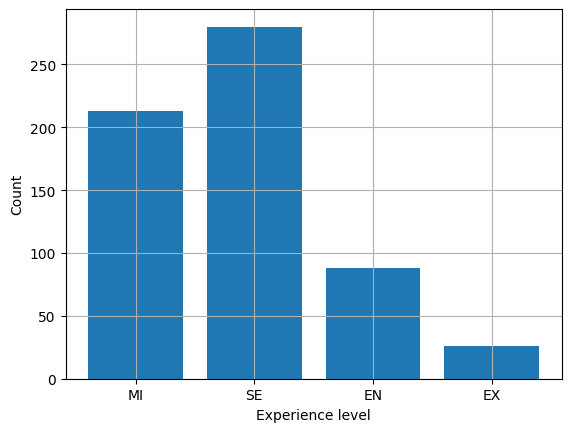

In [43]:
fig, ax = plt.subplots()
levels = df['experience_level'].unique()
counts = []
for level in levels:
    counts.append(df['experience_level'].loc[df['experience_level'] == level].count())
print(levels)
print(counts)
ax.bar(levels, counts)
plt.xlabel('Experience level')
plt.ylabel('Count')
plt.grid()
plt.show()

In [44]:
df.experience_level = pd.Categorical(df.experience_level)
df = df.assign(experience_level_code=df.experience_level.cat.codes)
df.employment_type = pd.Categorical(df.employment_type)
df = df.assign(employment_type_code=df.employment_type.cat.codes)
df.employee_residence = pd.Categorical(df.employee_residence)
df = df.assign(employee_residence_code=df.employee_residence.cat.codes)
df.company_size = pd.Categorical(df.company_size)
df = df.assign(company_size_code=df.company_size.cat.codes)
df.company_location = pd.Categorical(df.company_location)
df = df.assign(company_location_code=df.company_location.cat.codes)
df.job_title = pd.Categorical(df.job_title)
df = df.assign(job_title_code=df.job_title.cat.codes)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_code,employment_type_code,employee_residence_code,company_size_code,company_location_code,job_title_code
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,2,2,14,0,12,22
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,3,2,32,2,29,41
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,3,2,20,1,18,7
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,2,2,23,2,20,47
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,3,2,55,0,48,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,3,2,55,1,48,17
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,3,2,55,1,48,17
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,3,2,55,1,48,12
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,3,2,55,1,48,12


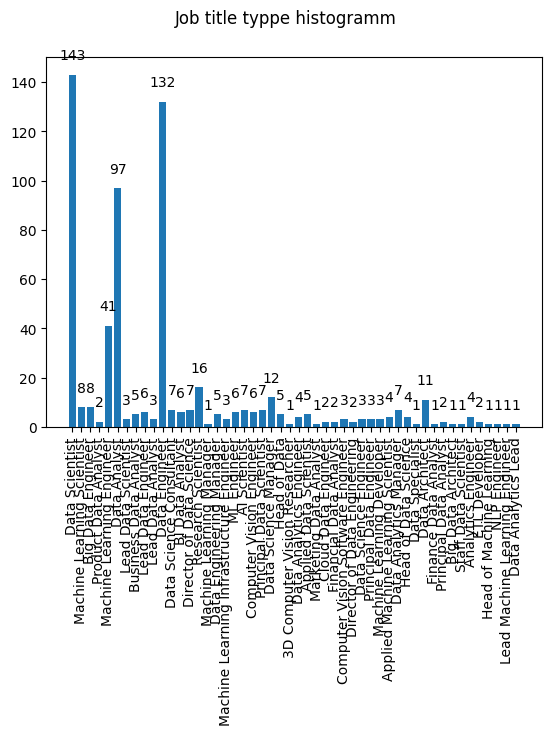

In [45]:
values = []
levels = df['job_title'].unique()
for level in df['job_title'].unique():
    values.append(df['job_title'].loc[df['job_title'] == level].count())
bars = plt.bar(levels, values)
plt.xticks(rotation=90)
plt.suptitle('Job title typpe histogramm')
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 5, value, ha="center", va="bottom"
    )
plt.show()

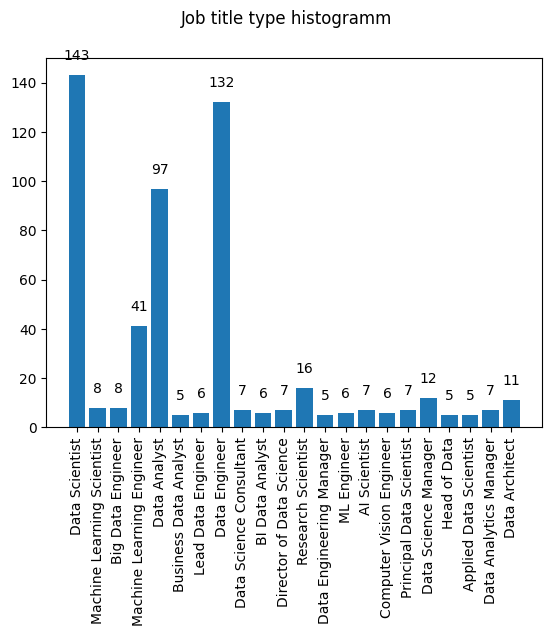

In [46]:
values = []
levels = []
levels_in = df['job_title'].unique()
for level in levels_in:
    value = df['job_title'].loc[df['job_title'] == level].count()
    if value >= 5:
        levels.append(level)
        values.append(value)
bars = plt.bar(levels, values)
plt.xticks(rotation=90)
plt.suptitle('Job title type histogramm')
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 5, value, ha="center", va="bottom"
    )
plt.show()

Insights:

Data Scientist - это наиболее распространенная должность, за которой следуют Data Engineer и Data Analyst.

In [47]:
import seaborn as sb

Text(0.5, 0.98, 'Years of Work')

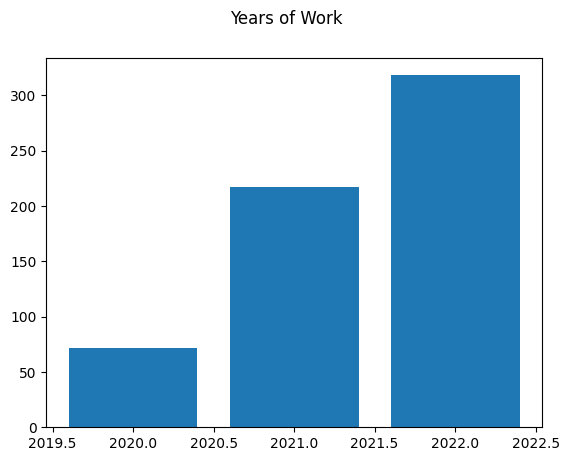

In [48]:
values = []
levels = df['work_year'].unique()
for level in df['work_year'].unique():
    values.append(df['work_year'].loc[df['work_year'] == level].count())
plt.bar(levels, values)
plt.suptitle("Years of Work")

In [49]:
df['employment_type'].unique()

['FT', 'CT', 'PT', 'FL']
Categories (4, object): ['CT', 'FL', 'FT', 'PT']

Text(0.5, 0.98, 'Employment types')

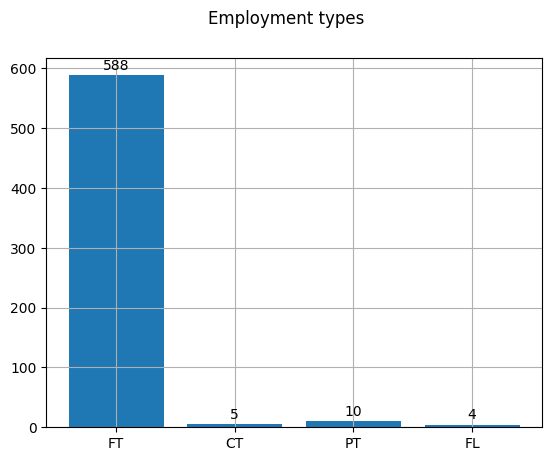

In [50]:
values = []
levels = df['employment_type'].unique()
for level in df['employment_type'].unique():
    values.append(df['employment_type'].loc[df['employment_type'] == level].count())
bars = plt.bar(levels, values)
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 5, value, ha="center", va="bottom"
    )
plt.grid()
plt.suptitle("Employment types")

In [51]:
df['salary_currency'].unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [52]:
salary_currency_1 = df.groupby('salary_currency').size().reset_index().sort_values(by=0, ascending=False)[:10]
salary_currency_1.columns = ['salary_currency', 'count']
salary_currency_1

,salary_currency,count
16,USD,398
7,EUR,95
8,GBP,44
10,INR,27
2,CAD,18
11,JPY,3
13,PLN,3
15,TRY,3
5,CNY,2
6,DKK,2


In [53]:
employee_residence = df['employee_residence'].value_counts()[:5]
employee_residence

US    332
GB     44
IN     30
CA     29
DE     25
Name: employee_residence, dtype: int64

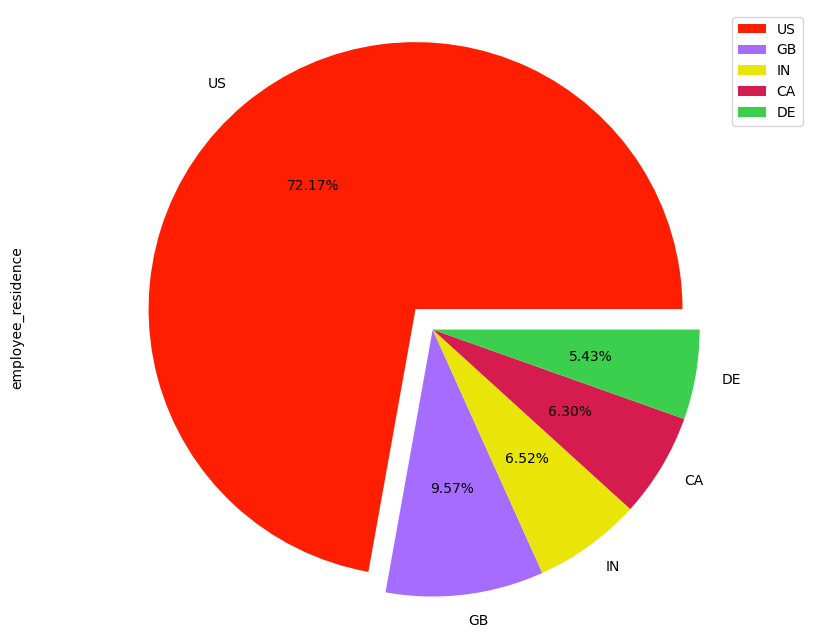

In [54]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0, 0, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

employee_residence.plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=employee_residence.index, loc="best")

In [55]:
company_location = df['company_location'].value_counts()[:5]
company_location

US    355
GB     47
CA     30
DE     28
IN     24
Name: company_location, dtype: int64

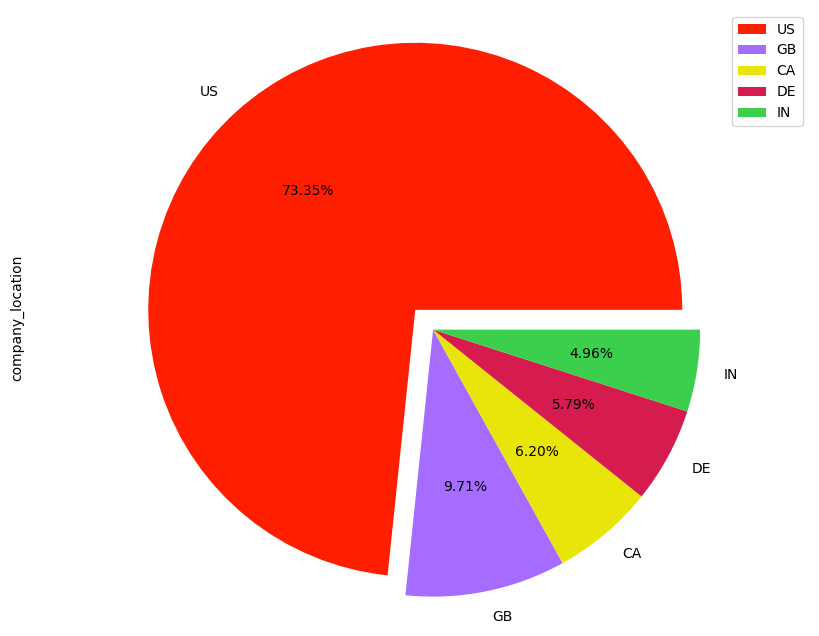

In [56]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0, 0, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

company_location.plot(kind='pie',
                      colors=colors,
                      explode=explode,
                      autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=company_location.index, loc="best")
plt.show()

Insights:

Соединенным Штатам принадлежит наибольшее количество специалистов по обработке данных,
за которыми следуют Великобритания, Индия, Канада и другие.
Большинство специалистов по обработке данных родом из Северной Америки или Европы.
Эта профессия распространяется также и в азиатском регионе.

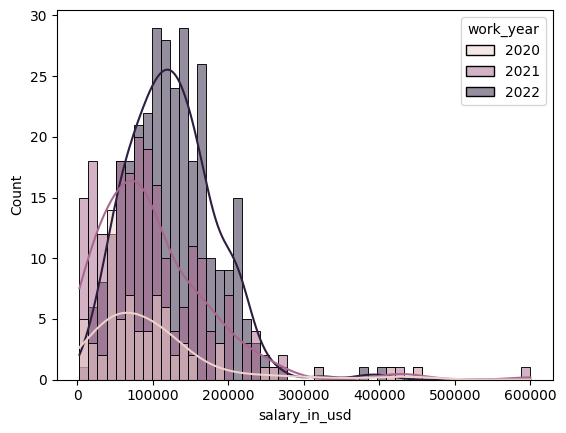

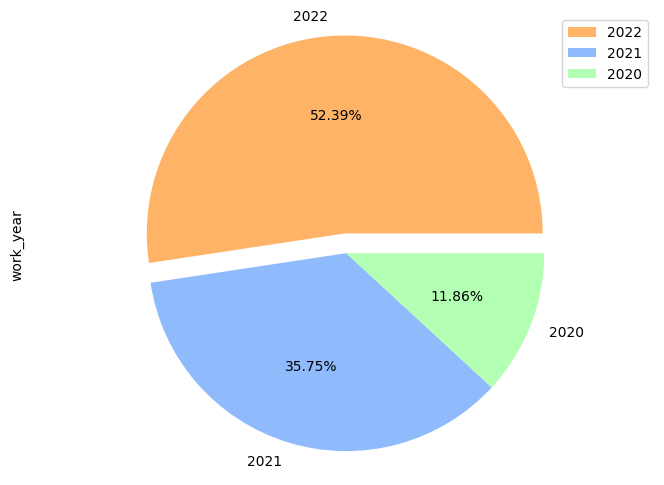

In [57]:
sns.histplot(x='salary_in_usd', data=df, kde=True, hue='work_year', bins=50)
plt.show()

years = df['work_year'].value_counts()
plt.figure(figsize=(8, 6), )
explode = (0.1, 0, 0)
colors = ['#ffb366', '#8FBAFB', '#b3ffb3']

years.plot(kind='pie',
           colors=colors,
           explode=explode,
           autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=years.index, loc="best")
plt.show()

Insights:

Мы видим, что средняя зарплата специалистов по обработке данных растет с течением времени.

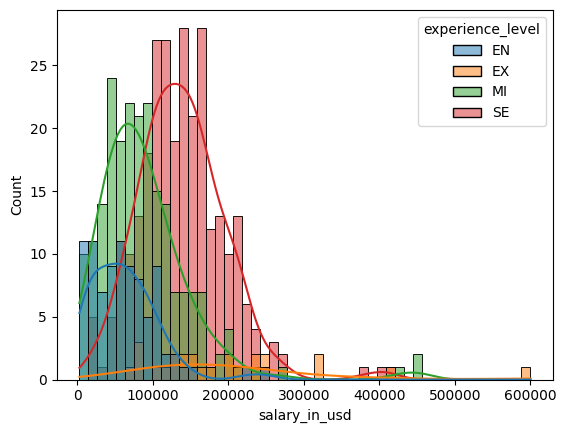

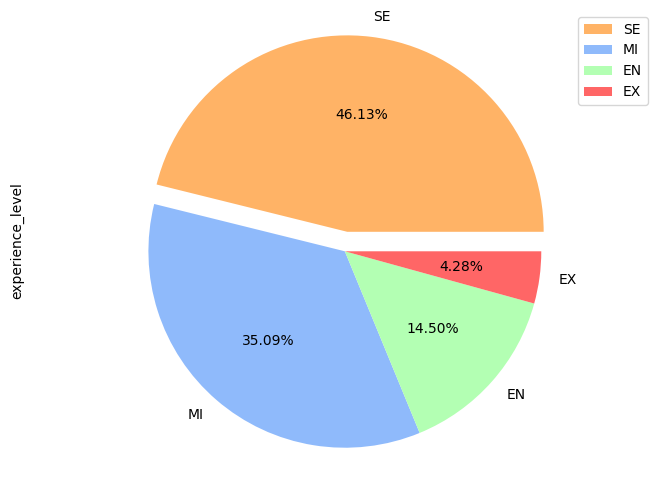

In [58]:
sns.histplot(x='salary_in_usd', data=df, kde=True, hue='experience_level', bins=50)
plt.show()

exp_levels = df['experience_level'].value_counts()
plt.figure(figsize=(8, 6), )
explode = (0.1, 0, 0, 0)
colors = ['#ffb366', '#8FBAFB', '#b3ffb3', '#ff6666']

exp_levels.plot(kind='pie',
                colors=colors,
                explode=explode,
                autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=exp_levels.index, loc="best")
plt.show()

Insights:

Большинство специалистов по обработке данных занимают Senior Level с соотношением 46.13%, за которыми следуют специалисты Mid Level
и Entry Level
Лишь немногие находятся на Expert Level с долей 4.28%.

Некоторые на Expert Level зарабатывают больше других. Кроме того, их диапазон заработка выше, чем у других.
Большинство работников Senior Level зарабатывают от 100000 до 140000
Большинство работников Mid Level зарабатывают от 60000 до 80000
Большинство работников Entry Level зарабатывают от 30000 до 50000

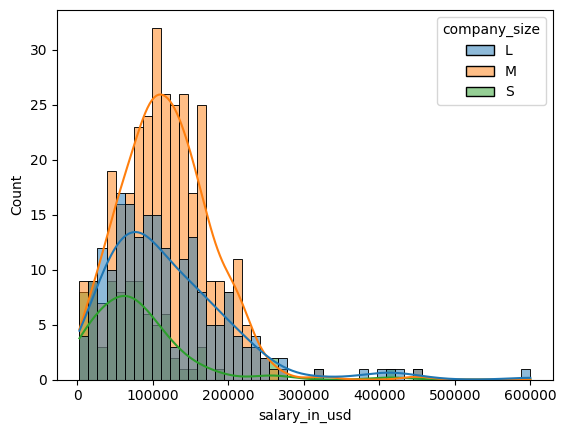

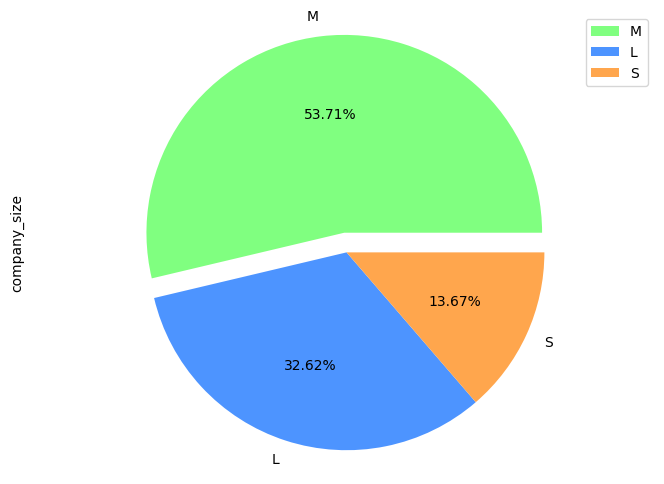

In [59]:
sns.histplot(x='salary_in_usd', data=df, kde=True, hue='company_size', bins=50)
plt.show()

companies = df['company_size'].value_counts()
plt.figure(figsize=(8, 6), )
explode = (0.1, 0, 0)
colors = ['#80ff80', '#4d94ff', '#ffa64d']

companies.plot(kind='pie',
               colors=colors,
               explode=explode,
               autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=companies.index, loc="best")
plt.show()

Большинство компаний, занимающихся обработкой данных, являются средними с долей в 53,71%,
за которыми следуют крупные компании с долей в 32,62%.
Лишь немногие из них малые с долей в 13,67%.

Большинство сотрудников средних компаний зарабатывают от 90000 до 120000
Большинство сотрудников крупных компаний зарабатывают от 70000 до 90000
Большинство сотрудников небольших компаний зарабатывают от 60000 до 80000

Text(0.5, 0, 'Job title')

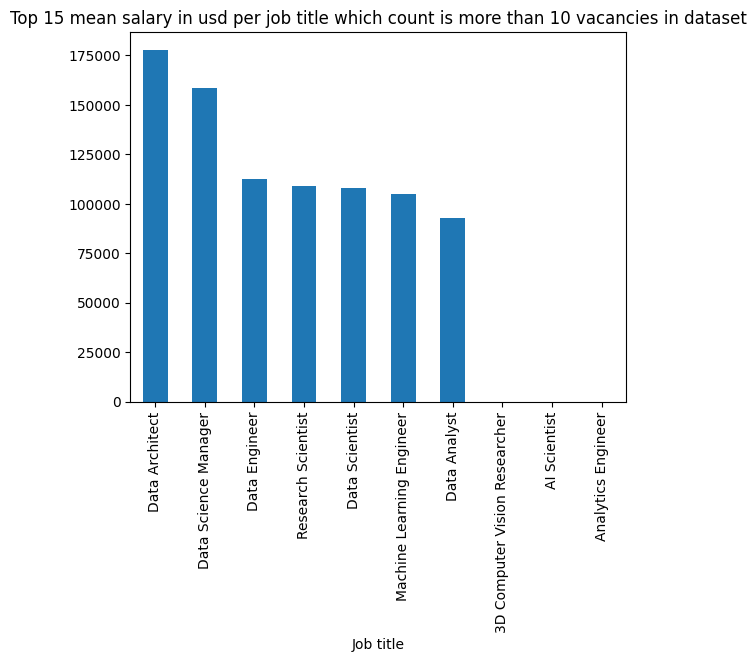

In [60]:
df_top = df.groupby('job_title').filter(lambda x: len(x) > 10)
mean_sal_jobtitle = df_top.groupby('job_title')['salary_in_usd'].mean().round(2).sort_values(ascending=False).head(10)
mean_sal_jobtitle.plot(kind='bar')
plt.title('Top 15 mean salary in usd per job title which count is more than 10 vacancies in dataset')
plt.xlabel('Job title')

Insights:

Data Architect лидирует по средней зарплате, за ним следуют Data Science manager, Data Engineer и другие.

In [61]:
mean_sal_exp = df.groupby('experience_level')['salary_in_usd'].mean().round(2).sort_values(ascending=False)
mean_sal_exp

experience_level
EX    199392.04
SE    138617.29
MI     87996.06
EN     61643.32
Name: salary_in_usd, dtype: float64

Text(0.5, 0, 'Experience level')

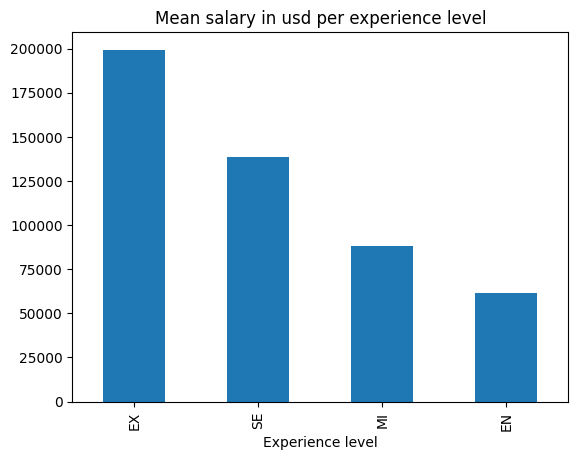

In [62]:

mean_sal_jobtitle = df.groupby('experience_level')['salary_in_usd'].mean().round(2).sort_values(ascending=False).head(
    10)
mean_sal_jobtitle.plot(kind='bar')
plt.title('Mean salary in usd per experience level')
plt.xlabel('Experience level')

In [63]:
pd.crosstab(index=df.experience_level, columns=df.work_year, values=df.salary_in_usd, aggfunc=np.mean)

work_year,2020,2021,2022
experience_level,,,
EN,63648.6000,59101.021277,65423.428571
EX,202416.5000,223752.727273,178313.846154
MI,85950.0625,85490.088889,91193.956044
SE,137240.5000,126596.188406,143043.398964


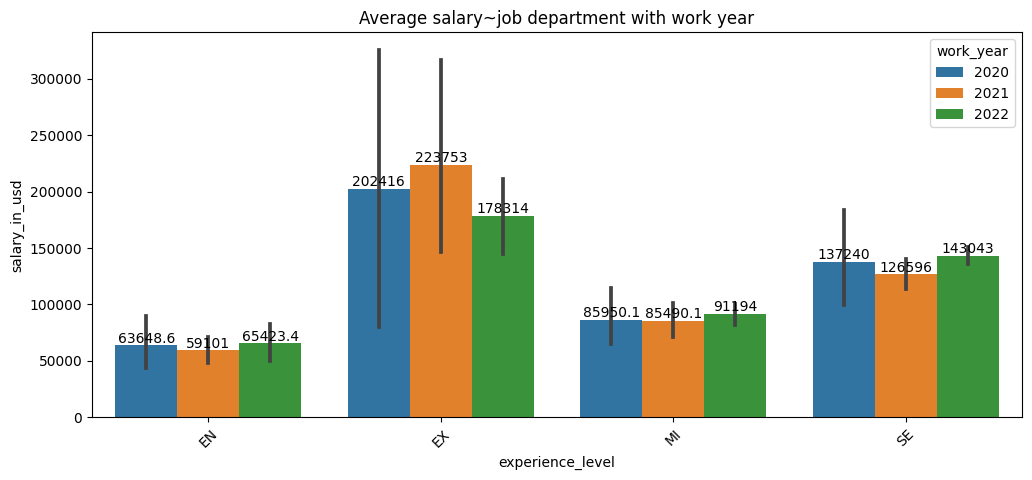

In [64]:
plt.figure(figsize=(12, 5))

ax = sns.barplot(x="experience_level", y="salary_in_usd", hue="work_year", data=df)
plt.xticks(rotation=45)
plt.title("Average salary~job department with work year")

for i in ax.containers:  #to set a label on top of the bars.
    ax.bar_label(i, )

In [65]:
pd.crosstab(df.experience_level, df.work_year)

work_year,2020,2021,2022
experience_level,,,
EN,20,47,21
EX,2,11,13
MI,32,90,91
SE,18,69,193


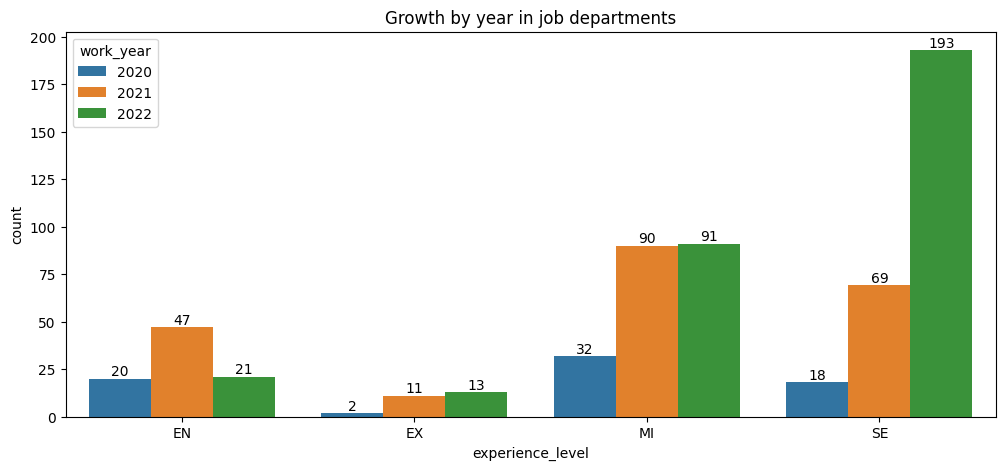

In [66]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(x="experience_level", hue="work_year", data=df)

plt.title("Growth by year in job departments")

for i in ax.containers:  #to set a label on top of the bars.
    ax.bar_label(i, )

C:\Users\ru-lo\AppData\Local\Temp\ipykernel_18428\642951843.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


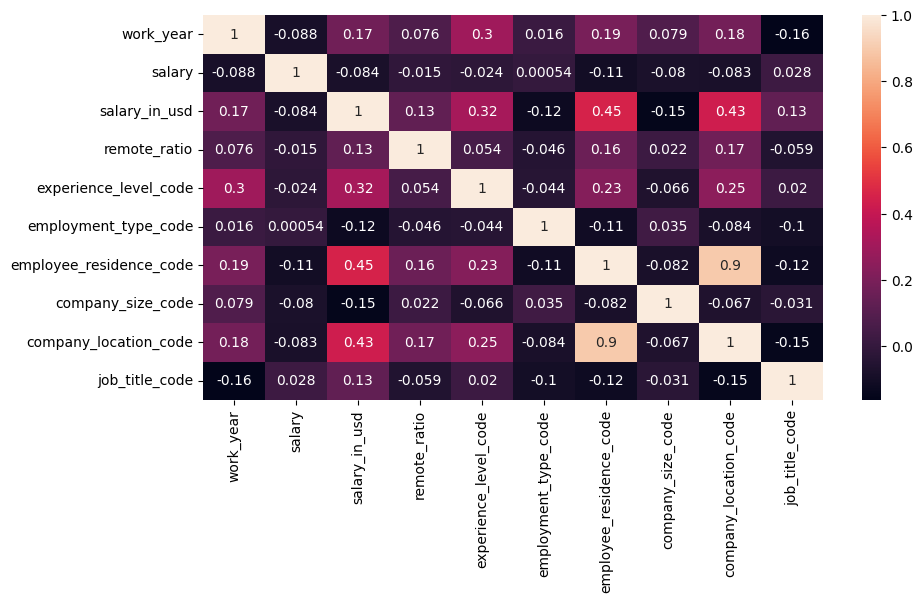

In [69]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sb.heatmap(corr, annot=True)
plt.show()

Insights:

Можно наблюдать высокую корреляцию между местоположением компании и местоположением работника.
Можно наблюдать определенную положительную корреляцию кореляцию между: зарплатой и местоположением компании, зарплатой и местопололжением работника, а также зарплатой и опытностью сотрудника

Вывод:

Перед применением данных для предсказания зарплаты сотрудника, необходимо сгруппировать должности на 4-8 групп и отсеять или учесть отлайеры в отдельные группы. Также избавится от слабоколлерриуемых с зарплатой величин величин